<div dir="ltr" style="text-align: left;" trbidi="on">
<h2 style="text-align: left;">
100 Days of ML Day 66</h2>
<h2 style="text-align: left;">
Horses or Humans Image Classification</h2>
<div style="text-align: left;">
Worked on training a CNN for classifying humans and horses using Tensorflow.</div>
<br />
Github: <br />
<div style="text-align: left;">
<a href="https://github.com/hithesh111/Hith100/blob/master/100Days/day066.ipynb">https://github.com/hithesh111/Hith100/blob/master/100Days/day066.ipynb</a> </div>
<br />
<br /></div>


In [1]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

TensorFlow 2.x selected.


In [0]:
import tensorflow_datasets as tfds
import numpy as np
import math
import matplotlib.pyplot as plt

In [0]:
# tfds.list_builders()
dataset,metadata = tfds.load('horses_or_humans',as_supervised=True,with_info=True)

In [0]:
train_dataset,test_dataset = dataset['train'], dataset['test']

In [0]:
class_names = ['Horse','Human']

In [6]:
n_train = metadata.splits['train'].num_examples
n_test = metadata.splits['test'].num_examples
print(n_train,n_test)

1027 256


In [0]:
def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images = images/255
  return images, labels

In [0]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [0]:
#Caching to keep in memory to do faster training
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

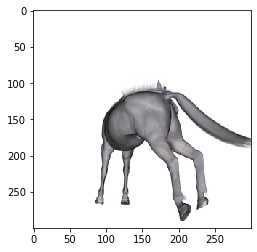

In [10]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((300,300,3))

plt.imshow(image)

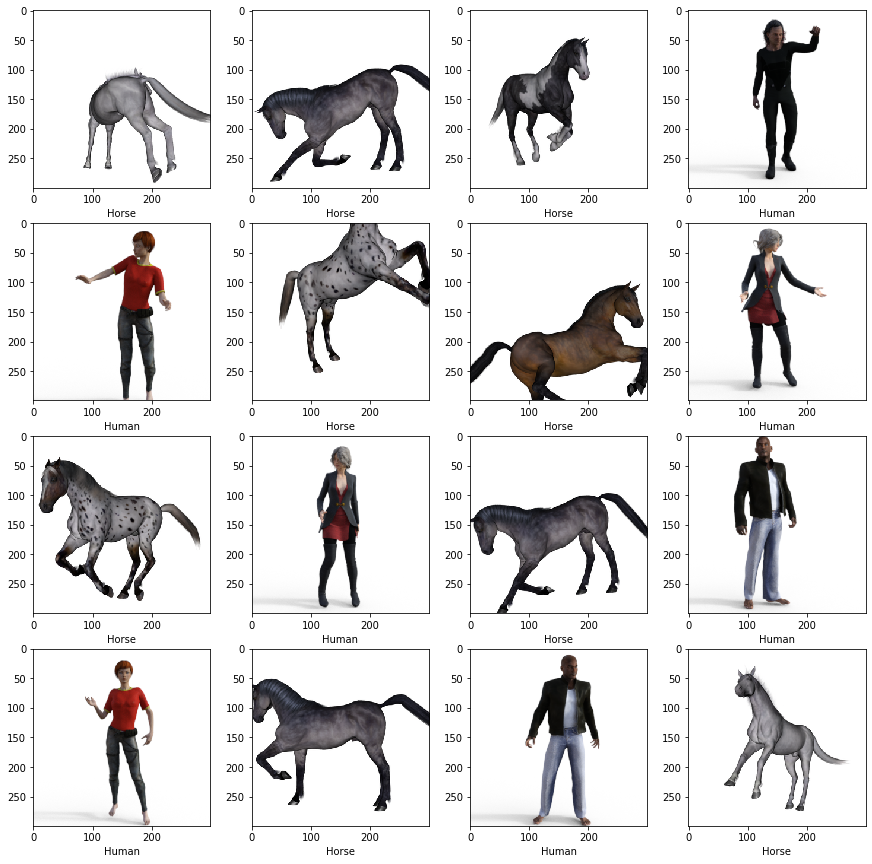

In [11]:
plt.figure(figsize=(15,15))
i = 0
for (image,label) in test_dataset.take(16):
  image = image.numpy().reshape((300,300,3))
  plt.subplot(4,4,i+1)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i=i+1
plt.show()

In [0]:
l0=tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=((300, 300, 3)))
l1=tf.keras.layers.MaxPooling2D((2, 2), strides=2)
l2=tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu)
l3=tf.keras.layers.MaxPooling2D((2, 2), strides=2)
l4=tf.keras.layers.Flatten()
l5=tf.keras.layers.Dense(128, activation=tf.nn.relu)
l6=tf.keras.layers.Dense(2,  activation=tf.nn.softmax)

In [0]:
model = tf.keras.Sequential([l0,l1,l2,l3,l4,l5,l6])

In [0]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [15]:
BATCH_SIZE = 16
train_dataset = train_dataset.repeat().shuffle(n_train).batch(BATCH_SIZE)
test_dataset.batch(BATCH_SIZE)

<DatasetV1Adapter shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>

In [16]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(n_train/BATCH_SIZE))

Train for 65 steps
Epoch 1/5
65/65 [==============================] - 11s 169ms/step - loss: 1.7627 - accuracy: 0.7933
Epoch 2/5
65/65 [==============================] - 4s 57ms/step - loss: 0.0758 - accuracy: 0.9692
Epoch 3/5
65/65 [==============================] - 4s 56ms/step - loss: 0.0090 - accuracy: 0.9962
Epoch 4/5
65/65 [==============================] - 4s 57ms/step - loss: 8.9178e-04 - accuracy: 1.0000
Epoch 5/5
65/65 [==============================] - 4s 58ms/step - loss: 2.3495e-04 - accuracy: 1.0000


In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(n_test/BATCH_SIZE))
print('Test Accuracy:', test_accuracy)

ValueError: ignored